## Smitesh Nitin Patil                                                        Student ID :22223696

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Part 1: Logistic Regression with stochastic gradient descent

1: Brief description of algorithm, including references to sources used.\
2: Correct implementation of logistic regression (single-node neural net), including correct implementation of gradient descent, able to handle different numbers of training cases and different numbers of attributes.

Logistic regression is a supervised machine learning algorithm that is used to solve classification task that is binary, i.e. it has two outputs 1 and 0. 

The hypthesis we are trying to learn through logistic regression is similar to line equation y= mx+c
This value of hypthoses is then passed to an activation function(sigmoid in this case) which generalizes the value between 0 and 1

$$y = sigmoid(\sum w_{i}x_{i} + b)$$

where x1, x2.. xn are our features w1, w2.. w3 are the weights we are trying to adjust, b is the bias and y is the prediction.
Initially, we randomize our weights and then we forward propogate on those weights to calculate a hypythesis y which is then checked against the true value of y. This error is squared to get absolute value.
$$error = (y_{pred}-y_{actual})^{2}$$
                
We have to minimize this error during each iteration, stochastic gradient descent was used for this process. Unlike batch gradient descent where we calculate the error for whole trainset and gradient descent the error. In stochastic process, we take each training case and get its error this error is then used to calculate the partial derivatives of each weight and bias. later this value is used to adjust weights which is regulated by learning rate or "alpha".
$$\Delta w = error*x$$
$$\Delta b = error$$
As the model fits on data the weights keep getting adjusted and error is reduced and we get a model generalized on data
$$W = W - \alpha *\Delta w$$
$$B = B- \alpha*\Delta b$$
References:

[1] CT5133 (Deep Learning) Week 2 Lecture Notes \
[2] “Machine learning | course | stanford online.” [Online]. Available: https://online.stanford.edu/courses/cs229-machine-learning. [Accessed: 25-Feb-2023].

In [2]:
class LogisticRegressionSGD:
    #initializing epoch, learning rate and threshold fro  constrcutor call
    def __init__(self, epoch, alpha, threshold):
        self.epoch = epoch
        self.alpha = alpha
        self.threshold = threshold
        self.weight = None
        self.bias = None
        self.error = []
        
    #sigmoid for activation function    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
        
    # fit function for training on train_data
    def fit(self, X, y, x_val, y_val):
        self.error = []
        # weights and bias initialize
        self.weight = np.random.rand(np.shape(X)[1])
        self.bias = np.random.rand(1)
        #first loop for epoch, taking whole data in epoch
        for i in range(self.epoch):
            # initializing epoch error
            error = 0
            
            # forward pass for calculating prediction
            pred = self.sigmoid(np.dot(X, self.weight) + self.bias)
            
            # loop for stochastic (taking each training sample once)
            for x, y_pred, y_act in zip(X, pred, y):
                #caculating error prediciton - actual
                error += (y_pred - y_act)**2
                #calculating error terms that needs to adjust weights
                dw = np.dot(x.T, (y_pred-y_act))
                db = y_pred - y_act
                #adjusting weights
                self.weight -= self.alpha*dw
                self.bias -= self.alpha*db
            #storing mse error value for each loop
            self.error.append(1/len(X)*error)
            
            #making predictions on validation set
            pred = self.predict(x_val)
            
            #printing errors for each epoch
            print("Epoch :", i,"loss: ", np.round(1/len(X)*error,2),
                  " validation set accuracy: ", np.round(accuracy_score(y_val, pred),2))
            
    def predict_prob(self, X):
        #predict_prob for probabilities output
        pred = self.sigmoid(np.dot(X, self.weight) + self.bias)
        return pred
    
    def predict(self, X):
        #predict for output whole values
        pred = self.sigmoid(np.dot(X, self.weight) + self.bias)
        roundoff = lambda x: [1 if ele >= self.threshold else 0 for ele in x] 
        pred = roundoff(pred)
        return pred

# Part 2

1: Code to read in a dataset with variable number of training cases and attributes, and divide it into a training set, validation set and testing set.\
2: Blobs dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.\
3: Moons dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.

In [3]:
#evaluate function taken from module CT5120 (Intro to natual language processing)
def evaluate(labels, predictions):
    
  assert len(labels) == len(predictions)

  score = 0.0
  
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  #populating variables
  for label, prediction in zip(labels, predictions):
        if label == 1 and prediction == 1:
            true_positive += 1
        elif label == 0 and prediction == 0:
            true_negative += 1
        elif label == 0 and prediction == 1:
            false_positive += 1
        else:
            false_negative += 1
  #calculating precision, recall, f1score and accuracy for two classes
  accuracy_score = (true_positive + true_negative) / (true_positive 
                                                      + true_negative + false_positive  + false_negative)
  f1_score = true_positive/(true_positive + 0.5*(false_positive + false_negative))

  score = """ True Positive: %s \t False Positive: %s \n False Negative: %s \t True Negative: %s 
  \n\n Accurarcy: %s
  \n F1 Score : %s"""% (true_positive, false_negative, false_positive, 
                        true_negative, accuracy_score, f1_score)
    
  return print(score)


References:

[1] CT5120(Intro to Natural Language Processing)  Assigment 2 : Smitesh Patil

# Linearly non-separable data

References for Linear seperable data load:\
[1] CT5133 (Deep Learning) Assignment 1 Load Dataset Code

In [4]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons500.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test,
                                                test_size = 0.5)

In [6]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 500
len(X[0]): 2
len(X[:,0]): 500
X: nsamples = 500 , nattribs = 2
len(y) 500
np.shape(y): (500,)
np.shape(yt): (500, 1)
y transpose: nsamples = 500 , nattribs = 1


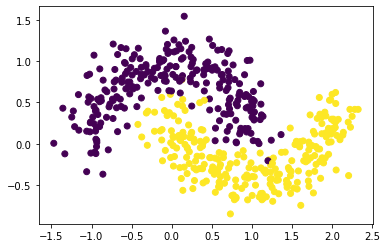

In [7]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [8]:
# calling constructor of logistic regression with 20 epochs 0.01 learning rate and 0.5 threshold
lr = LogisticRegressionSGD(20, 0.01, 0.5)

In [9]:
lr.fit(x_train, y_train, x_val, y_val)

pred = lr.predict(x_test)

Epoch : 0 loss:  0.37  validation set accuracy:  0.73
Epoch : 1 loss:  0.19  validation set accuracy:  0.75
Epoch : 2 loss:  0.14  validation set accuracy:  0.76
Epoch : 3 loss:  0.13  validation set accuracy:  0.79
Epoch : 4 loss:  0.12  validation set accuracy:  0.81
Epoch : 5 loss:  0.11  validation set accuracy:  0.81
Epoch : 6 loss:  0.11  validation set accuracy:  0.81
Epoch : 7 loss:  0.1  validation set accuracy:  0.81
Epoch : 8 loss:  0.1  validation set accuracy:  0.83
Epoch : 9 loss:  0.1  validation set accuracy:  0.83
Epoch : 10 loss:  0.1  validation set accuracy:  0.83
Epoch : 11 loss:  0.1  validation set accuracy:  0.83
Epoch : 12 loss:  0.09  validation set accuracy:  0.83
Epoch : 13 loss:  0.09  validation set accuracy:  0.84
Epoch : 14 loss:  0.09  validation set accuracy:  0.84
Epoch : 15 loss:  0.09  validation set accuracy:  0.84
Epoch : 16 loss:  0.09  validation set accuracy:  0.84
Epoch : 17 loss:  0.09  validation set accuracy:  0.84
Epoch : 18 loss:  0.09  v

In [10]:
#calling the evaluate method
evaluate(y_test, pred)

 True Positive: 31 	 False Positive: 7 
 False Negative: 2 	 True Negative: 35 
  

 Accurarcy: 0.88
  
 F1 Score : 0.8732394366197183


In [11]:
pred = lr.predict_prob(x_test)

# calculating tpr and fpr for roc curve to check performance later on linearly seperable and non-separable data
tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(y_test, pred)
auc_lr_nsd = roc_auc_score(y_test, pred)

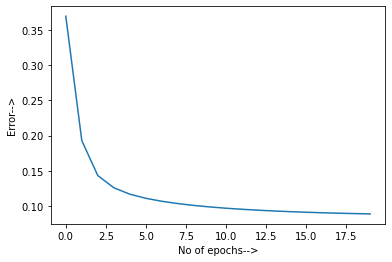

In [12]:
#loss curve against number of epochs
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly seperable dataset

References for Linear seperable data load:\
[1] CT5133 (Deep Learning) Assignment 1 Load Dataset Code

In [13]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

In [14]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 3
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 3
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


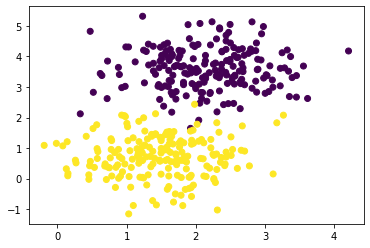

In [15]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=42)

In [17]:
#same for linearly seperable data
lr = LogisticRegressionSGD(25, 0.1, 0.6)

In [18]:
lr.fit(x_train, y_train, x_val, y_val)
pred = lr.predict(x_test)

Epoch : 0 loss:  0.41  validation set accuracy:  0.53
Epoch : 1 loss:  0.49  validation set accuracy:  0.58
Epoch : 2 loss:  0.43  validation set accuracy:  0.9
Epoch : 3 loss:  0.06  validation set accuracy:  0.92
Epoch : 4 loss:  0.06  validation set accuracy:  0.92
Epoch : 5 loss:  0.05  validation set accuracy:  0.92
Epoch : 6 loss:  0.05  validation set accuracy:  0.93
Epoch : 7 loss:  0.05  validation set accuracy:  0.93
Epoch : 8 loss:  0.04  validation set accuracy:  0.93
Epoch : 9 loss:  0.04  validation set accuracy:  0.93
Epoch : 10 loss:  0.04  validation set accuracy:  0.93
Epoch : 11 loss:  0.03  validation set accuracy:  0.93
Epoch : 12 loss:  0.03  validation set accuracy:  0.93
Epoch : 13 loss:  0.03  validation set accuracy:  0.95
Epoch : 14 loss:  0.03  validation set accuracy:  0.95
Epoch : 15 loss:  0.03  validation set accuracy:  0.95
Epoch : 16 loss:  0.03  validation set accuracy:  0.95
Epoch : 17 loss:  0.03  validation set accuracy:  0.95
Epoch : 18 loss:  0.0

### Observation 
Logistic Regression works better on linearly separable data than non-separable data as it fits a linear hypothesis, proven by the AUC Value

In [19]:
evaluate(y_test, pred)

 True Positive: 33 	 False Positive: 1 
 False Negative: 0 	 True Negative: 26 
  

 Accurarcy: 0.9833333333333333
  
 F1 Score : 0.9850746268656716


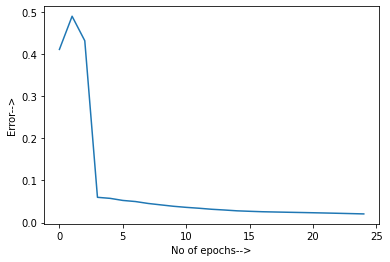

In [20]:
plt.plot(list(range(0, len(lr.error))), lr.error)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

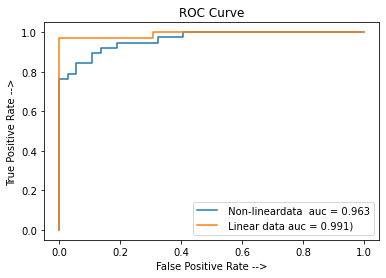

In [21]:
pred = lr.predict_prob(x_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(y_test, pred)
auc_lr_sd = roc_auc_score(y_test, pred)

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# Part 3 : Impelement Shallow Neural Network
1: Brief description of algorithm, including references to sources used.\
2: Correct implementation of a feed-forward neural network with 1 hidden layer and a standard kernel such as sigmoid, including backprop, extending your previous implementation of logistic regression.\
3: Train and test on the Blobs and Moons datasets, present results, and make observations on results.
Part 4 – Challenging Task: 3 marks

Logistic Regression cannot learn complex non-linear hypthoses. Polynomial order regression could be useful but it tends to overfit on the training data. Neural Networks extend on the idea of logistic regression. Where each neuron is basically a 'logistic' unit. By having hidden layes it can generalize and learn hypothesis

In shallow neural network, the neural network consists of a input layer, one hidden layer and one output layer.

Forward propogation:

Just like in Logistic regression we nned to forward propogate out input with randomly initialized weights to generate the prediction. In Shallow Neural Network, This forward propogation would be carried out from every node in input layer to evvry output in hidden layer.  This structure is called a dense layer. So the weights for a network with m input nodes and n hidden nodes would be m X n with the bias and similarly for hidden nodes to output it would be n x 1.

$$Z1 = \sum w_{i}*x + b_{i}$$
$$A1 = sigmoid(Z1)$$
$$Z2 = \sum(w_{j}*A1) + b_{j}$$
$$A2 = sigmoid(Z2)$$

Where i refers to weights and biases from layer input to hidden and j referes to weights and biases from layer hidden to output

Backpropogation:

Again, the prediction generated from forward propgation are compared with the ground truth y and the error is backpropogated.
For the output layer the error is used to caluclate the delta weights and bias values these are then to adjust weights and biases in previous layers using chain rule.

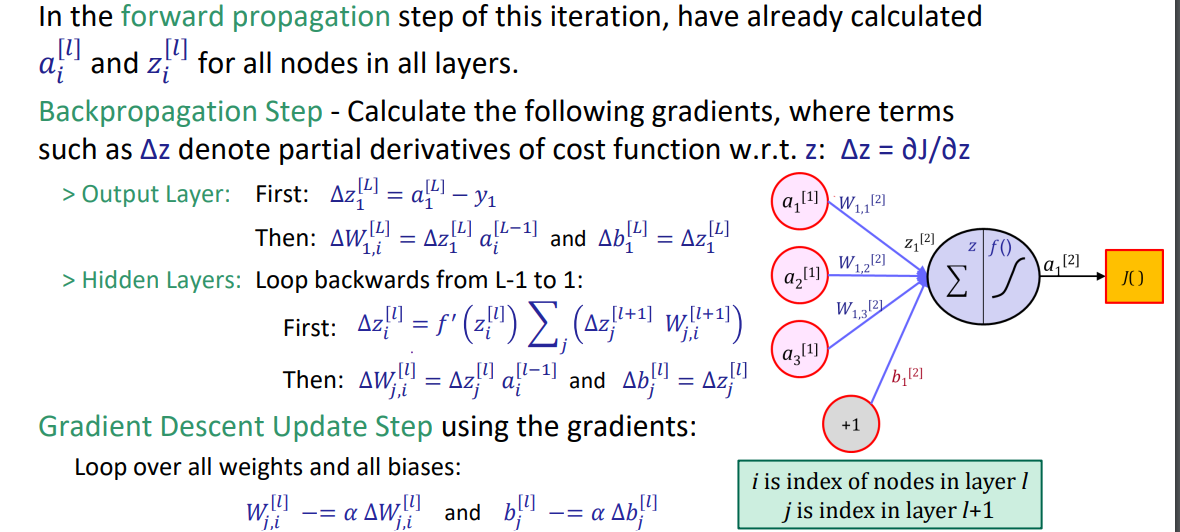
[1] Image Source


References:\
[1] CT5133 (Deep Learning) Week 3\
[2]“Machine learning | course | stanford online.” [Online]. Available: https://online.stanford.edu/courses/cs229-machine-learning. [Accessed: 25-Feb-2023]. \
[3]P. D. Ramesh Paudel, “Building a neural network with a single hidden layer using Numpy,” Medium, 31-Mar-2022. [Online]. Available: https://towardsdatascience.com/building-a-neural-network-with-a-single-hidden-layer-using-numpy-923be1180dbf. [Accessed: 25-Feb-2023]. 

In [22]:
class shallowNeuralNet:
    #constructor with eochs, learning_rate and hidden nodes
    def __init__(self, epochs, learning_rate, hidden_nodes):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = [None, None]
        self.bias = [None, None]
        self.hidden_nodes = hidden_nodes
        self.error_list = []
    
    #sigmoid and sigmoid derivative function
    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def sigmoid_derivative(self, val):
        return self.sigmoid(val) * (1 - self.sigmoid(val))
    
    #fit function for training on train data
    def fit(self, X_full, Y_full, x_val, y_val):
        #initialising weights and biases
        self.weights[0] = np.random.randn(self.hidden_nodes, X_full.shape[0]) * 0.01
        self.bias[0] = np.zeros((self.hidden_nodes, 1))
        self.weights[1] = np.random.randn(Y_full.shape[0], self.hidden_nodes) * 0.01
        self.bias[1] = np.zeros((Y_full.shape[0], 1))
        #error list for plotting losses
        self.error_list = []
        # epoch loop
        for i in range(0, self.epochs):
            error = 0
            # loop for each training case in the train_data
            for X, Y in zip(X_full.T, Y_full.T):
                X = X.reshape(1, X.shape[0])
                Y = Y.reshape(1, Y.shape[0])
                # forward propogation
                self.Z1 = np.dot(self.weights[0], X.T) + self.bias[0]
                self.A1 = self.sigmoid(self.Z1)
                self.Z2 = np.dot(self.weights[1], self.A1) + self.bias[1]
                self.A2 = self.sigmoid(self.Z2)
                
                #error from weights adjusted during current loop 
                error += (np.squeeze(self.A2) - np.squeeze(Y))**2
                
                # backward propogation
                dZ2 = self.A2 - Y
                dW2 = np.dot(dZ2, self.A1.T)
                dB2 = np.sum(dZ2)
                dZ1 = np.dot(self.weights[1].T, dZ2) * self.sigmoid_derivative(self.A1)
                dW1 = np.dot(dZ1, X)
                dB1 = np.sum(dZ1)

                # adjusting weights based on partial derivatives calculated
                self.weights[0] -= self.learning_rate * dW1
                self.bias[0] -= self.learning_rate * dB1
                self.weights[1] -= self.learning_rate * dW2
                self.bias[1] -= self.learning_rate * dB2
            self.error_list.append(error)
            
            # making predictions on validation set
            pred = self.predict(x_val)
            #printing validation accuracy
            if self.epochs > 100:
                if i % 50 == 0:
                    print("Epoch :", i,"loss: ", np.round(1/len(X)*error,3), 
                          "Valdation set accuracy: ", np.round(accuracy_score(np.squeeze(pred), np.squeeze(y_val))))
            else:
                print("Epoch :", i,"loss: ", np.round(1/len(X)*error,3), 
                      "Valdation set accuracy: ", np.round(accuracy_score(pred[0], y_val[0])))
                
    #predict probabilites
    def predict_prob(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = self.sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = self.sigmoid(layer2)
        
        return activation2
    
    #predict roundoff values
    def predict(self, pred):
        layer1 = np.dot(self.weights[0], pred) + self.bias[0]
        activation1 = self.sigmoid(layer1)
        layer2 = np.dot(self.weights[1], activation1) + self.bias[1]
        activation2 = self.sigmoid(layer2)
        
        return np.round(activation2)

# Linearly Non Separable Data

References for Linear seperable data load:\
[1] CT5133 (Deep Learning) Assignment 1 Load Dataset Code

In [23]:
df = pd.read_csv("moons500.csv")
y = df['Class'].values

del df['Class'] 
X = df.values

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)
X_train = X_train.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
X_test = X_test.T
Y_test = Y_test.reshape(1, Y_test.shape[0])
X_val = X_val.T
Y_val = Y_val.reshape(1, Y_val.shape[0])

In [25]:
snn = shallowNeuralNet(600, 0.001, 30)

In [26]:
snn.fit(X_train, Y_train, X_val, Y_val)

Epoch : 0 loss:  87.59 Valdation set accuracy:  0.0
Epoch : 50 loss:  87.284 Valdation set accuracy:  0.0
Epoch : 100 loss:  83.513 Valdation set accuracy:  1.0
Epoch : 150 loss:  59.691 Valdation set accuracy:  1.0
Epoch : 200 loss:  41.276 Valdation set accuracy:  1.0
Epoch : 250 loss:  36.039 Valdation set accuracy:  1.0
Epoch : 300 loss:  33.102 Valdation set accuracy:  1.0
Epoch : 350 loss:  31.384 Valdation set accuracy:  1.0
Epoch : 400 loss:  30.507 Valdation set accuracy:  1.0
Epoch : 450 loss:  30.101 Valdation set accuracy:  1.0
Epoch : 500 loss:  29.922 Valdation set accuracy:  1.0
Epoch : 550 loss:  29.846 Valdation set accuracy:  1.0


In [27]:
pred = snn.predict(X_test)

In [28]:
evaluate(np.squeeze(pred), np.squeeze(Y_test))

 True Positive: 30 	 False Positive: 4 
 False Negative: 7 	 True Negative: 34 
  

 Accurarcy: 0.8533333333333334
  
 F1 Score : 0.8450704225352113


In [29]:
# tpr fpr values for plotting roc curve
pred = snn.predict_prob(X_test)

tpr_lr_nsd, fpr_lr_nsd, _ = roc_curve(np.squeeze(Y_test), np.squeeze(pred))
auc_lr_nsd = roc_auc_score(np.squeeze(Y_test), np.squeeze(pred))

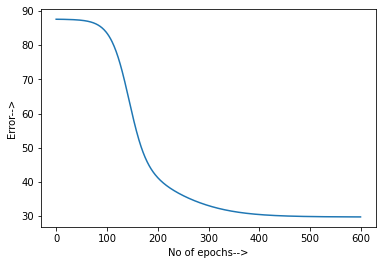

In [30]:
#plotting curve
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

# Linearly Separable Data

References:\
[1] CT5133 (Deep Learning) Assignment 1 Load Dataset Code

In [31]:
df = pd.read_csv("blobs400.csv")

y = df['Class'].values

del df['Class'] 
X = df.values   

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)
X_train = X_train.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
X_test = X_test.T
Y_test = Y_test.reshape(1, Y_test.shape[0])
X_val = X_val.T
Y_val = Y_val.reshape(1, Y_val.shape[0])

In [33]:
snn = shallowNeuralNet(200, 0.001, 50)

snn.fit(X_train, Y_train, X_val, Y_val)

Epoch : 0 loss:  70.241 Valdation set accuracy:  1.0
Epoch : 50 loss:  63.955 Valdation set accuracy:  1.0
Epoch : 100 loss:  16.914 Valdation set accuracy:  1.0
Epoch : 150 loss:  8.089 Valdation set accuracy:  1.0


In [34]:
pred = snn.predict(X_test)

### Observation
Although Shallow Neural Nework worked relatively better on non-separable data, the metrics are not improved by a huge margin

In [35]:
evaluate(np.squeeze(pred), np.squeeze(Y_test))

 True Positive: 33 	 False Positive: 0 
 False Negative: 1 	 True Negative: 26 
  

 Accurarcy: 0.9833333333333333
  
 F1 Score : 0.9850746268656716


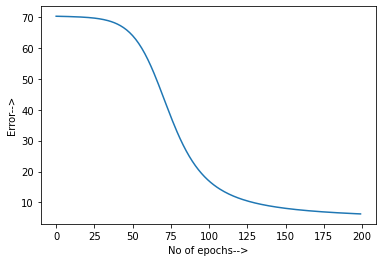

In [36]:
plt.plot(list(range(0, len(snn.error_list))), snn.error_list)
plt.xlabel("No of epochs-->")
plt.ylabel("Error-->")
plt.show()

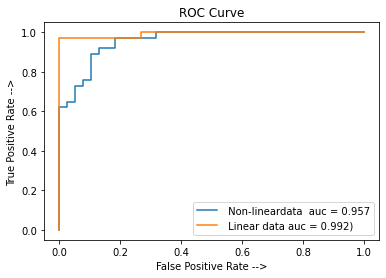

In [37]:
#plotting roc curve for linear and non linear data
pred = snn.predict_prob(X_test)
tpr_lr_sd, fpr_lr_sd, _ = roc_curve(np.squeeze(Y_test), np.squeeze(pred))
auc_lr_sd = roc_auc_score(np.squeeze(Y_test), np.squeeze(pred))

plt.plot(tpr_lr_nsd, fpr_lr_nsd, linestyle='-', label=' Non-lineardata  auc = %0.3f' % auc_lr_nsd)
plt.plot(tpr_lr_sd, fpr_lr_sd, linestyle='-', label=' Linear data auc = %0.3f)' % auc_lr_sd)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
    
plt.legend()
plt.title("ROC Curve")
plt.savefig("Roc curve")
plt.show()

# Part 4:  Challenging Task - MNIST DATA
1: Code to read in the big dataset, and sample subsets for training, validation and testing.\
2: Train the NN, tune on the validation set if required, and test on the test set.\
3: Present results and make observations on your testing.

References:\
[1] CT5133 (Deep Learning) Assignment 1 Load Dataset Code

In [38]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [39]:
(train_imgs, train_labels) = load_mnist('./', 'train')

In [40]:
(test_imgs, test_labels) = load_mnist('./', 't10k')

In [41]:
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

idx = np.isin(train_labels, [7, 5])
train_labels = train_labels[idx] 
train_imgs = train_imgs[idx]
train_imgs = sc.fit_transform(train_imgs)

train_labels[train_labels == 5] = 0
train_labels[train_labels == 7] = 1

idx = np.isin(test_labels, [7, 5])
test_labels = test_labels[idx] 
test_imgs = test_imgs[idx]
test_imgs = sc.transform(test_imgs)
test_labels[test_labels == 5] = 0
test_labels[test_labels == 7] = 1

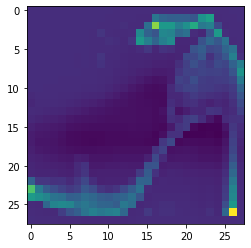

In [43]:
picture = train_imgs[120]
picture.shape = (28,28)

plt.imshow(picture)

In [44]:
X_train = train_imgs
X_train = X_train.T
Y_train = train_labels
Y_train = Y_train.reshape(1, Y_train.shape[0])

X_test = test_imgs[0:1500]
X_test = X_test.T
Y_test = test_labels[0:1500]
Y_test = Y_test.reshape(1, Y_test.shape[0])

X_val = test_imgs[1500:]
X_val = X_val.T
Y_val = test_labels[1500:]
Y_val = Y_val.reshape(1, Y_val.shape[0])

In [45]:
snn = shallowNeuralNet(20, 0.1, 392)


snn.fit(X_train, Y_train, X_val, Y_val)

Epoch : 0 loss:  625.622 Valdation set accuracy:  1.0
Epoch : 1 loss:  508.495 Valdation set accuracy:  1.0
Epoch : 2 loss:  466.103 Valdation set accuracy:  1.0
Epoch : 3 loss:  443.434 Valdation set accuracy:  1.0
Epoch : 4 loss:  412.53 Valdation set accuracy:  1.0
Epoch : 5 loss:  394.257 Valdation set accuracy:  1.0
Epoch : 6 loss:  383.181 Valdation set accuracy:  1.0
Epoch : 7 loss:  375.322 Valdation set accuracy:  1.0
Epoch : 8 loss:  367.667 Valdation set accuracy:  1.0
Epoch : 9 loss:  362.5 Valdation set accuracy:  1.0
Epoch : 10 loss:  360.985 Valdation set accuracy:  1.0
Epoch : 11 loss:  356.292 Valdation set accuracy:  1.0
Epoch : 12 loss:  354.941 Valdation set accuracy:  1.0
Epoch : 13 loss:  358.886 Valdation set accuracy:  1.0
Epoch : 14 loss:  352.257 Valdation set accuracy:  1.0
Epoch : 15 loss:  348.804 Valdation set accuracy:  1.0
Epoch : 16 loss:  348.736 Valdation set accuracy:  1.0
Epoch : 17 loss:  351.596 Valdation set accuracy:  1.0
Epoch : 18 loss:  348.7

In [46]:
pred = snn.predict(X_test)

In [47]:
evaluate(np.squeeze(pred), np.squeeze(Y_test))

 True Positive: 695 	 False Positive: 36 
 False Negative: 42 	 True Negative: 727 
  

 Accurarcy: 0.948
  
 F1 Score : 0.946866485013624


# PART 5 : Multi-Layer Neural Network  w/ enhancement

1: Brief description of your enhancement to the algorithm, including references used.\
2: Correct implementation of your enhancement.\
3: Perform new training and testing on the big dataset, present results, and make observations on your testing.

Adding multiple hidden layers allows a model to learn hypotheses that would be difficult for simple models to learn. 

In Multi-layer neural network, the number of hidden layers are flexible the weight matrices would be n-1 where n are the number of layers in network. 

Enchancement : Early stopping was implemented as an enhancement here. 

Two conditions where check for early stopping.
1. Validation accuracy decreases and error increases
2. Validation accuracy decreases and current epoch validation accuracy > 0.8

If either of the conditions are meet the training stops and weights of previous epoch are used for predictions\

Reasons for condition : Error was fluctuating randomly for initial epochs hence the first condition would be meet pretty early early on and algorithm would terminate it was checked along with validation accuracy. When the validation accuracy goes above 0.8 the loss imrprovement was minimal and validation would go down, hence terminate training in that case as well. 

[1]“L10.3 early stopping,” YouTube, 09-Mar-2021. [Online]. Available: https://www.youtube.com/watch?v=YA1OdkiHJBY&amp;list=WL&amp;index=1. [Accessed: 25-Feb-2023]\
[2] CT5133 (Deep Learning) Week 3\
[3]“Machine learning | course | stanford online.” [Online]. Available: https://online.stanford.edu/courses/cs229-machine-learning. [Accessed: 25-Feb-2023]. \
[4]P. D. Ramesh Paudel, “Building a neural network with a single hidden layer using Numpy,” Medium, 31-Mar-2022. [Online]. Available: https://towardsdatascience.com/building-a-neural-network-with-a-single-hidden-layer-using-numpy-923be1180dbf. [Accessed: 25-Feb-2023]. 

In [48]:
class MLnet:
    # initlialize object
    def __init__(self, alpha, epochs, hidden_list):
        self.alpha = alpha
        self.epochs = epochs
        self.hidden_nodes = hidden_list
        self.weights = None
        self.bias = None
        # storing previous weights and bias in case of early stopping
        self.previous_weights = None
        self.previous_bias = None
        
    #sigmoid and its derivative
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def fit(self, X_train, Y_train, X_val, Y_val):
        #size contains all the nodes from all the layers len(size)-1 = len of network
        self.size = [X_train.shape[0]] + self.hidden_nodes + [Y_train.shape[0]]
        
        # inilialising weights and biases bases on r Xavier’s Random Weight Initialization[3]
        self.weights = [np.random.randn(self.size[i], self.size[i+1]) * np.sqrt(1/(self.size[0]+self.size[-1])) for i in range(0, len(self.size)- 1)]
        self.bias = [np.random.randn(1, self.size[i]) * np.sqrt(1/(self.size[0]+self.size[-1])) for i in range(1, len(self.size))]
        
        #loss error and validation accuracy for plotting later
        self.error_list = []
        self.validation_accuracy = []
        self.log_loss = []
        
        #loop for each epoch
        for i in range(0, self.epochs, 1):
            error = 0
            log_loss = 0
            # loop for each training  case in epoch
            for x,y in zip(X_train.T, Y_train.T):
                # reshaping each training case
                x = x.reshape(1, x.shape[0])
                y = y.reshape(1, y.shape[0])
                self.activations = []
                
                
                # forward pass
                for j in range(0, len(self.size) - 1):
                    
                    if j == 0:
                        # intialize Z for first layer input as x
                        Z = np.dot(x, self.weights[j]) + self.bias[j]
                    else:
                        # rest of Z's caculated from activation value of previous later
                        Z = np.dot(self.activations[j-1], self.weights[j]) + self.bias[j]
                    A = self.sigmoid(Z)
                    #storing in activation list last activation [-1] is the output
                    self.activations.append(A)
                    
                error += (np.squeeze(self.activations[-1] - np.squeeze(y)) ** 2)
                log_loss += np.squeeze(y)* np.log(np.squeeze(self.activations[-1])) + (1- np.squeeze(y))*np.log(1- np.squeeze(self.activations[-1]))
                # backward pass
                
                #initializing partial derivatives list
                delta_error = [None] * (len(self.size) - 1)
                delta_weights = [None] * (len(self.size) - 1)
                delta_bias = [None] * (len(self.size) - 1)
                
                #inverse loop for adjusting weights
                for k in range(len(self.size) - 2, -1, -1):
                    if k == len(self.size) - 2:
                        #for last layer error is calculated against ground truth y
                        delta_error[k] = self.activations[k] - y
                        #partial der for weight is its dot product with next layer activation
                        # for bias its just sum of error
                        delta_weights[k] = np.dot(self.activations[k-1].T, delta_error[k])
                        delta_bias[k] = np.sum(delta_error[k])
                    else:
                        # for other later the previous layer error dot product with weights along with activation derivative
                        # of current layer activation
                        delta_error[k] = np.dot( delta_error[k+1], self.weights[k+1].T) * self.sigmoid_derivative(self.activations[k])
                        #partial weights and bias same as last layer
                        delta_weights[k] = np.dot(delta_error[k], self.activations[k].T) # try +1
                        delta_bias[k] = np.sum(delta_error[k])

                #simulatenous update for weight and bias based on delta values   
                for l in range(len(self.size) - 1):
                    self.weights[l] -= self.alpha * delta_weights[l]
                    self.bias[l] -= self.alpha * delta_bias[l]
            
            #validation accuracy and loss printing
            pred = self.predict(X_val)
            validation_accuracy = np.round(accuracy_score(np.squeeze(pred.T.astype(int)), np.squeeze(Y_val)),2)
    
            print("Epoch :", i,"Error: ",  error, " Validation set accuracy: ", validation_accuracy, " Log Loss: ", abs(log_loss))
        
            # early stopping from epoch number 1
            if i > 0:
                #condition either both validation accuracy and loss decreases stop or
                # if only validation accuracy decreases and its value is above 0.8
                if (validation_accuracy < self.validation_accuracy[-1] and validation_accuracy > 0.8) or (validation_accuracy < self.validation_accuracy[-1] and error > self.error_list[-1]):
                    print("Early stopping for overfitting at epoch ", i)
                    print("Using weights set from previous epoch")
                    self.weights = self.previous_weights
                    self.bias = self.previous_bias
                    break
                
            # appending errors and val accuract
            self.error_list.append(error)
            self.validation_accuracy.append(validation_accuracy)
            self.log_loss.append(log_loss)
            #storing weighst of current epoch before next epoch starts
            self.previous_weights = self.weights
            self.previous_bias = self.bias
    
    #predict funcition
    def predict(self, x):
        self.activations = []
        # a forward pass with weights adjusted
        for i in range(0, len(self.size)-1):
            if i == 0:
                Z = np.dot(x.T, self.weights[i]) + self.bias[i]
            else:
                Z = np.dot(self.activations[i-1], self.weights[i]) + self.bias[i]
            A = self.sigmoid(Z)
            self.activations.append(A)
        return np.round(self.activations[-1])
    

In [49]:
# training on params learning rate 0.00001, 50 epochs  and 392, 196 hidden nodes layer
mnn = MLnet(0.00001, 50, [392, 196])

In [50]:
mnn.fit(X_train, Y_train, X_val, Y_val)

Epoch : 0 Error:  3021.397521026671  Validation set accuracy:  0.47  Log Loss:  8360.89096428158
Epoch : 1 Error:  2989.2406231071504  Validation set accuracy:  0.48  Log Loss:  8296.229565875065
Epoch : 2 Error:  2984.987611673166  Validation set accuracy:  0.58  Log Loss:  8287.73760040222
Epoch : 3 Error:  2982.3831814503606  Validation set accuracy:  0.63  Log Loss:  8282.529991372428
Epoch : 4 Error:  2979.9073228161124  Validation set accuracy:  0.65  Log Loss:  8277.578011803045
Epoch : 5 Error:  2977.4553249854735  Validation set accuracy:  0.68  Log Loss:  8272.673500687715
Epoch : 6 Error:  2975.0200961204714  Validation set accuracy:  0.69  Log Loss:  8267.80244070009
Epoch : 7 Error:  2972.6045583946448  Validation set accuracy:  0.71  Log Loss:  8262.970703940311
Epoch : 8 Error:  2970.2138374213228  Validation set accuracy:  0.73  Log Loss:  8258.188545556923
Epoch : 9 Error:  2967.8541636662035  Validation set accuracy:  0.73  Log Loss:  8253.468426026364
Epoch : 10 Erro

In [51]:
pred = mnn.predict(X_test)

### Observation

A single layer neural network worked better tha 2 hidden layer network. This can be because the problem is relatively simple and can be generalized better on a single hidden layer neural net. Additionally, it would be having problems with vanishing gradient problem  i.e the error is to miniscule by the time it reaches the hidden layer

In [52]:
evaluate(np.squeeze(pred.T.astype(int)), np.squeeze(Y_test))

 True Positive: 687 	 False Positive: 245 
 False Negative: 50 	 True Negative: 518 
  

 Accurarcy: 0.8033333333333333
  
 F1 Score : 0.823247453565009


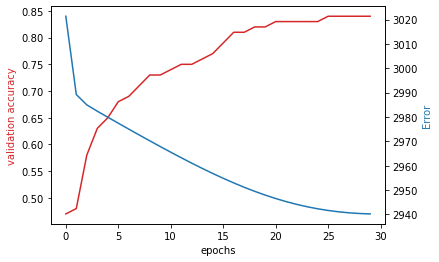

In [53]:
#plotting loss against validation accuracy
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(list(range(0, len(mnn.validation_accuracy))), mnn.validation_accuracy, color=color)
ax1.set_xlabel('epochs')
ax1.set_ylabel('validation accuracy', color = color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("Error", color = color)
ax2 = plt.plot(list(range(0, len(mnn.error_list))), mnn.error_list, color=color)
plt.show()